In [2]:
! pip install scanpy scSpectra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.1 MB

In [3]:
#import packages
import numpy as np
import json
import scanpy as sc
from collections import OrderedDict
import scipy
import pandas as pd
import matplotlib.pyplot as plt

#spectra imports
import Spectra as spc
from Spectra import Spectra_util as spc_tl
from Spectra import K_est as kst
from Spectra import default_gene_sets

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
adata = sc.read_h5ad('/content/drive/MyDrive/CS273B/TSP_SS2.h5ad')

In [4]:
annotations = spc.default_gene_sets.load()

In [ ]:
sc.pp.highly_variable_genes(adata)
adata = adata[:, adata.var.highly_variable]

In [ ]:
obs_key = 'cell_ontology_class'

In [ ]:
list(set(annotations.keys()))

['global',
 'CD8_T',
 'gdT',
 'B_memory',
 'pDC',
 'plasma',
 'NK',
 'Treg',
 'mast',
 'CD4_T',
 'B_GC',
 'DC',
 'ILC3',
 'B_naive',
 'MDC']

In [ ]:
mapped_cell_types = {
    'myeloid dendritic cell': 'DC',
    'plasmacytoid dendritic cell': 'pDC',
    'regulatory t cell': 'Treg',
    'b cell': 'B_naive',
    'natural killer cell': 'NK',
    'plasma cell': 'plasma',
    'innate lymphoid cell': 'ILC3',
    'cd8-positive, alpha-beta t cell': 'CD8_T',
    'activated cd8-positive, alpha-beta t cell': 'CD8_T',
    'gamma-delta t cell': 'gdT',
    'mast cell': 'mast',
    'cd4-positive, alpha-beta t cell': 'CD4_T',
    'activated cd4-positive, alpha-beta t cell': 'CD4_T'
}

In [ ]:
new_gene_programs_dict = {}

for detailed_cell_type in list(set(adata.obs[obs_key])):
    if detailed_cell_type in mapped_cell_types:
        coarse_cell_type = mapped_cell_types[detailed_cell_type]
        if coarse_cell_type in annotations:
            new_gene_programs_dict[detailed_cell_type] = annotations[coarse_cell_type]
    else:
        new_gene_programs_dict[detailed_cell_type] = {}
new_gene_programs_dict['global'] = annotations['global']

In [ ]:
model = spc.est_spectra(adata=adata,
    gene_set_dictionary=new_gene_programs_dict,
    cell_type_key="cell_ontology_class",
    use_weights=True,
    lam=0.1, # varies depending on data and gene sets, try between 0.5 and 0.001
    delta=0.001,
    kappa=None,
    rho=0.001,
    use_cell_types=True,
    n_top_vals=50,
    label_factors=True,
    overlap_threshold=0.2,
    clean_gs = True,
    min_gs_num = 3,
    num_epochs=10
)

Cell type labels in gene set annotation dictionary and AnnData object are identical
removing gene set p-DC_CpG-TLR9_response for cell type plasmacytoid dendritic cell which is of length 7 1 genes are found in the data. minimum length is 3
removing gene set mast_granule-exocytosis for cell type mast cell which is of length 7 2 genes are found in the data. minimum length is 3
removing gene set all_lipophagy for cell type global which is of length 7 1 genes are found in the data. minimum length is 3
removing gene set all_chondroitine-sulfate_degradation for cell type global which is of length 10 1 genes are found in the data. minimum length is 3
removing gene set all_pterin_synthesis for cell type global which is of length 5 1 genes are found in the data. minimum length is 3
removing gene set all_MHC-I-presentation for cell type global which is of length 10 2 genes are found in the data. minimum length is 3
removing gene set all_taurine-hypotaurine_metabolism for cell type global which is

100%|██████████| 10/10 [00:52<00:00,  5.22s/it]


In [ ]:
import torch

In [ ]:
# calculating perplexity from the model
def compute_log_likelihood(model, data):
    num_cells, num_genes = data.shape
    data = torch.Tensor(data)

    # Extract necessary parameters
    eta = (torch.from_numpy(model.eta_matrices['global'])).double()
    programs = eta.shape[0]
    factors = torch.from_numpy(model.factors[:programs,:])
    cell_scores =torch.from_numpy(model.cell_scores[:,:programs])
    gene_scaling = torch.from_numpy(model.gene_scalings['global'])

    log_likelihood = 0.0
    for cell_idx in range(num_cells):
        cell_data = data[cell_idx]

        # Compute the interaction term in the gene program space
        interaction_term = torch.matmul(cell_scores[cell_idx], eta)  # Shape should be (num_programs, )

        # Map interaction term to gene space
        gene_prob = torch.matmul(interaction_term,factors)  # Shape should be (num_genes, )

        # Incorporate gene scaling
        gene_prob = torch.mul(gene_prob, gene_scaling)

        # Compute the log probability distribution over genes for this cell
        log_prob = torch.log_softmax(gene_prob, dim=0)

        # Compute log-likelihood for this cell
        log_likelihood += torch.sum(cell_data * log_prob).item()

    return log_likelihood

In [ ]:
eta = (torch.from_numpy(model.eta_matrices['global'])).double()
programs = eta.shape[0]
factors = torch.from_numpy(model.factors[:programs,:])
cell_scores =torch.from_numpy(model.cell_scores[:,:programs])
gene_scaling = torch.from_numpy(model.gene_scalings['global'])

In [ ]:
cell_scores.shape

torch.Size([41591, 135])

In [ ]:
factors.shape

torch.Size([135, 10658])

In [ ]:
recon = torch.matmul(cell_scores,factors)

In [ ]:
adata.X.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.95094369, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.66875059, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
recon

tensor([[1.0757e-07, 1.9283e-07, 1.7244e-07,  ..., 5.2785e-07, 3.9595e-07,
         2.5224e-07],
        [2.4777e-07, 4.4416e-07, 3.9720e-07,  ..., 1.2158e-06, 9.1203e-07,
         5.8100e-07],
        [2.3503e-07, 4.2133e-07, 3.7679e-07,  ..., 1.1534e-06, 8.6516e-07,
         5.5114e-07],
        ...,
        [2.2384e-07, 4.0126e-07, 3.5884e-07,  ..., 1.0984e-06, 8.2395e-07,
         5.2489e-07],
        [4.2976e-08, 7.7041e-08, 6.8896e-08,  ..., 2.1089e-07, 1.5819e-07,
         1.0078e-07],
        [7.0694e-07, 1.2673e-06, 1.1333e-06,  ..., 3.4691e-06, 2.6022e-06,
         1.6577e-06]], dtype=torch.float64)

In [ ]:
def compute_log_likelihood(data, data_reconstructed):
    # We have a reconstructed matrix to calculate log likelihood
    log_likelihood = (data * np.log(data_reconstructed) - data_reconstructed).sum()
    return log_likelihood

log_likelihood = compute_log_likelihood(torch.Tensor(adata.X.todense()), recon)

In [ ]:
# Calculate the number of words (total count of all genes across all cells)
num_words = torch.Tensor(adata.raw.X.todense()).sum().item()

# Calculate perplexity
def calculate_perplexity(log_likelihood, num_words):
    perplexity = np.exp(-log_likelihood / num_words)
    return perplexity

perplexity = calculate_perplexity(log_likelihood, num_words)
print("Perplexity:", perplexity)

Perplexity: tensor(1.0171, dtype=torch.float64)


In [ ]:
index_labels = adata.uns['SPECTRA_overlap'].index
gene_weights = pd.DataFrame(adata.uns['SPECTRA_factors'],
                            index= index_labels,
                            columns=adata.var[adata.var['spectra_vocab']].index)

In [ ]:
# coherence for global stuff
global_weights = gene_weights[gene_weights.index.str.contains('-global-')]

In [ ]:
global_weights.to_numpy().shape

(135, 10658)

In [ ]:
# Import data from MsigDB

import os
import requests
url = "https://data.broadinstitute.org/gsea-msigdb/msigdb/release/7.5.1/c5.all.v7.5.1.symbols.gmt"

response = requests.get(url)
gmt_content = response.text

# Save the file
gmt_file_path = "h.all.v7.5.1.symbols.gmt"
with open(gmt_file_path, "w") as gmt_file:
    gmt_file.write(gmt_content)

# Function to parse the .gmt file
def parse_gmt(file_path):
    gene_sets = []
    with open(file_path, "r") as file:
        for line in file:
            parts = line.strip().split("\t")
            gene_set_name = parts[0]
            genes = parts[2:]
            gene_sets.append(genes)
    return gene_sets

# Parse the downloaded .gmt file
gene_sets = parse_gmt(gmt_file_path)

In [ ]:
# Build a cooccurence network of the genes from the MsigDB gene sets
from collections import defaultdict

def build_cooccurrence_network(gene_sets):
    cooccurrence = defaultdict(set)
    for gene_set in gene_sets:
        for gene1 in gene_set:
            for gene2 in gene_set:
                if gene1 != gene2:
                    cooccurrence[gene1].add(gene2)
    return cooccurrence

cooccurrence_network = build_cooccurrence_network(gene_sets)

In [ ]:
# now I need to extract our topics and top genes
def get_top_genes(beta_matrix, feature_names, top_n=10):
    top_genes = []
    for topic_idx, topic in enumerate(beta_matrix):
        top_gene_indices = topic.argsort()[-top_n:][::-1]
        top_genes.append([feature_names[i] for i in top_gene_indices])
    return top_genes

In [ ]:
# generate a beta matrix which is topicsxgenes and load in the gene names from our anndata
beta_matrix = global_weights.to_numpy()
feature_names = global_weights.columns.tolist()
top_genes = get_top_genes(beta_matrix, feature_names)

In [ ]:
from itertools import combinations

In [ ]:
def calculate_gsea_coherence(top_genes, cooccurrence_network):
    coherence_scores = []
    for topic in top_genes:
        score = 0
        pairs_count = 0
        for gene1, gene2 in combinations(topic, 2):
            if gene2 in cooccurrence_network[gene1]:
                score += 1
            pairs_count += 1
        coherence_scores.append(score / pairs_count if pairs_count > 0 else 0)
    return np.mean(coherence_scores)

# Calculate coherence score based on MsigDB gene sets
gsea_coherence_score = calculate_gsea_coherence(top_genes, cooccurrence_network)
print("GSEA Coherence Score:", gsea_coherence_score)

GSEA Coherence Score: 0.7985185185185184


In [ ]:
top_genes_per_program = {}

# Iterate over each row in the DataFrame
for index, row in gene_weights.iterrows():
    # Sort the row by contributions in descending order and select the top 20 genes
    top_genes = row.sort_values(ascending=False).head(20).index.tolist()
    # Add the program and its top genes to the dictionary
    top_genes_per_program[index] = top_genes

In [ ]:
filtered_top_genes_per_program = {}

# Iterate over the original dictionary
for key, genes in top_genes_per_program.items():
    # Split the key to extract the parts
    parts = key.split('-X-')
    if len(parts) == 3:
        index, cell_type_specificity, assigned_label = parts
        # Check if the cell type specificity is not "global"
        if cell_type_specificity != 'global':
            # Use the cell type specificity as the new key
            filtered_top_genes_per_program[cell_type_specificity] = genes

In [ ]:
import gseapy as gp
import pandas as pd

In [ ]:
go_analysis_results = {}

# Iterate through each cell type and their associated genes
for cell_type, genes in filtered_top_genes_per_program.items():
    # Run GO enrichment analysis
    enr = gp.enrichr(gene_list=genes,
                     gene_sets=['GO_Biological_Process_2021'],
                     organism='Human')

    # Store the results in the dictionary
    go_analysis_results[cell_type] = enr.results

# Convert results to DataFrame and save to a file if needed
all_results = []
for cell_type, result in go_analysis_results.items():
    result['cell_type'] = cell_type  # Add a column for the cell type
    all_results.append(result)

# Concatenate all results into a single DataFrame
all_results_df = pd.concat(all_results, ignore_index=True)

In [ ]:
filtered_df = all_results_df[all_results_df['Adjusted P-value'] < 0.05]

top_combined_score_df = filtered_df.loc[filtered_df.groupby('cell_type')['Combined Score'].idxmax()]


unique_term_df = top_combined_score_df.drop_duplicates(subset='Term', keep='first')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage

In [ ]:
unique_term_df

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,cell_type
0,GO_Biological_Process_2021,regulation of sensory perception (GO:0051931),3/12,1.870300e-07,1.483475e-05,0,0,391.588235,6066.483731,OPRPN;SMR3B;SMR3A,acinar cell
96,GO_Biological_Process_2021,positive regulation of defense response to bac...,2/8,2.650430e-05,1.165075e-03,0,0,369.888889,3897.964407,KLK5;KLK7,acinar cell of salivary gland
164,GO_Biological_Process_2021,myeloid dendritic cell activation (GO:0001773),2/14,8.583036e-05,7.743749e-03,0,0,184.888889,1731.140146,CAMK4;SLAMF1,"activated cd4-positive, alpha-beta t cell"
382,GO_Biological_Process_2021,cellular response to platelet-derived growth f...,2/7,1.989010e-05,1.745356e-03,0,0,443.888889,4805.225246,HAS1;HAS2,adventitial cell
731,GO_Biological_Process_2021,trivalent inorganic anion homeostasis (GO:0072...,2/5,9.482778e-06,2.512936e-03,0,0,739.888889,8557.579527,SFRP4;FGFR4,alveolar type 2 fibroblast cell
...,...,...,...,...,...,...,...,...,...,...,...
18684,GO_Biological_Process_2021,skeletal muscle cell differentiation (GO:0035914),4/11,2.387706e-10,5.467846e-08,0,0,713.321429,15804.005741,MEGF10;MYF6;KLHL41;MYF5,skeletal muscle satellite stem cell
18913,GO_Biological_Process_2021,myofibril assembly (GO:0030239),5/43,5.466604e-10,6.231928e-08,0,0,174.929825,3730.762201,TMOD4;MYL2;TCAP;MYOZ1;MYOZ2,slow muscle cell
19196,GO_Biological_Process_2021,negative regulation of potassium ion transmemb...,2/8,2.650430e-05,4.426218e-03,0,0,369.888889,3897.964407,CASQ2;KCNAB1,smooth muscle cell
21056,GO_Biological_Process_2021,surfactant homeostasis (GO:0043129),2/7,1.989010e-05,1.501703e-03,0,0,443.888889,4805.225246,ABCA3;SFTPD,type i pneumocyte


In [ ]:
def score_cell_type_by_genes(adata, genes, cell_type):
    sub_adata = adata[adata.obs['cell_ontology_class'] == cell_type].copy()
    if len(genes) > 0 and sub_adata.n_obs > 0:
        sc.tl.score_genes(sub_adata, gene_list=genes, score_name='score')
        return sub_adata.obs['score'].mean()  # Average score of all cells of the type
    else:
        return np.nan

# Prepare the heatmap data matrix
heatmap_data = pd.DataFrame(index=unique_term_df['Term'], columns=adata.obs['cell_ontology_class'].unique())

for idx, row in unique_term_df.iterrows():
    genes = row['Genes'].split(';')
    genes = [gene for gene in genes if gene in adata.var_names]
    for cell_type in heatmap_data.columns:
        heatmap_data.at[row['Term'], cell_type] = score_cell_type_by_genes(adata, genes, cell_type)

# Replace NaNs and convert to float for clustering
heatmap_data.fillna(0, inplace=True)
heatmap_data = heatmap_data.astype(float)

/home/doug.henze/.conda/envs/Topic_Model/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/doug.henze/.conda/envs/Topic_Model/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


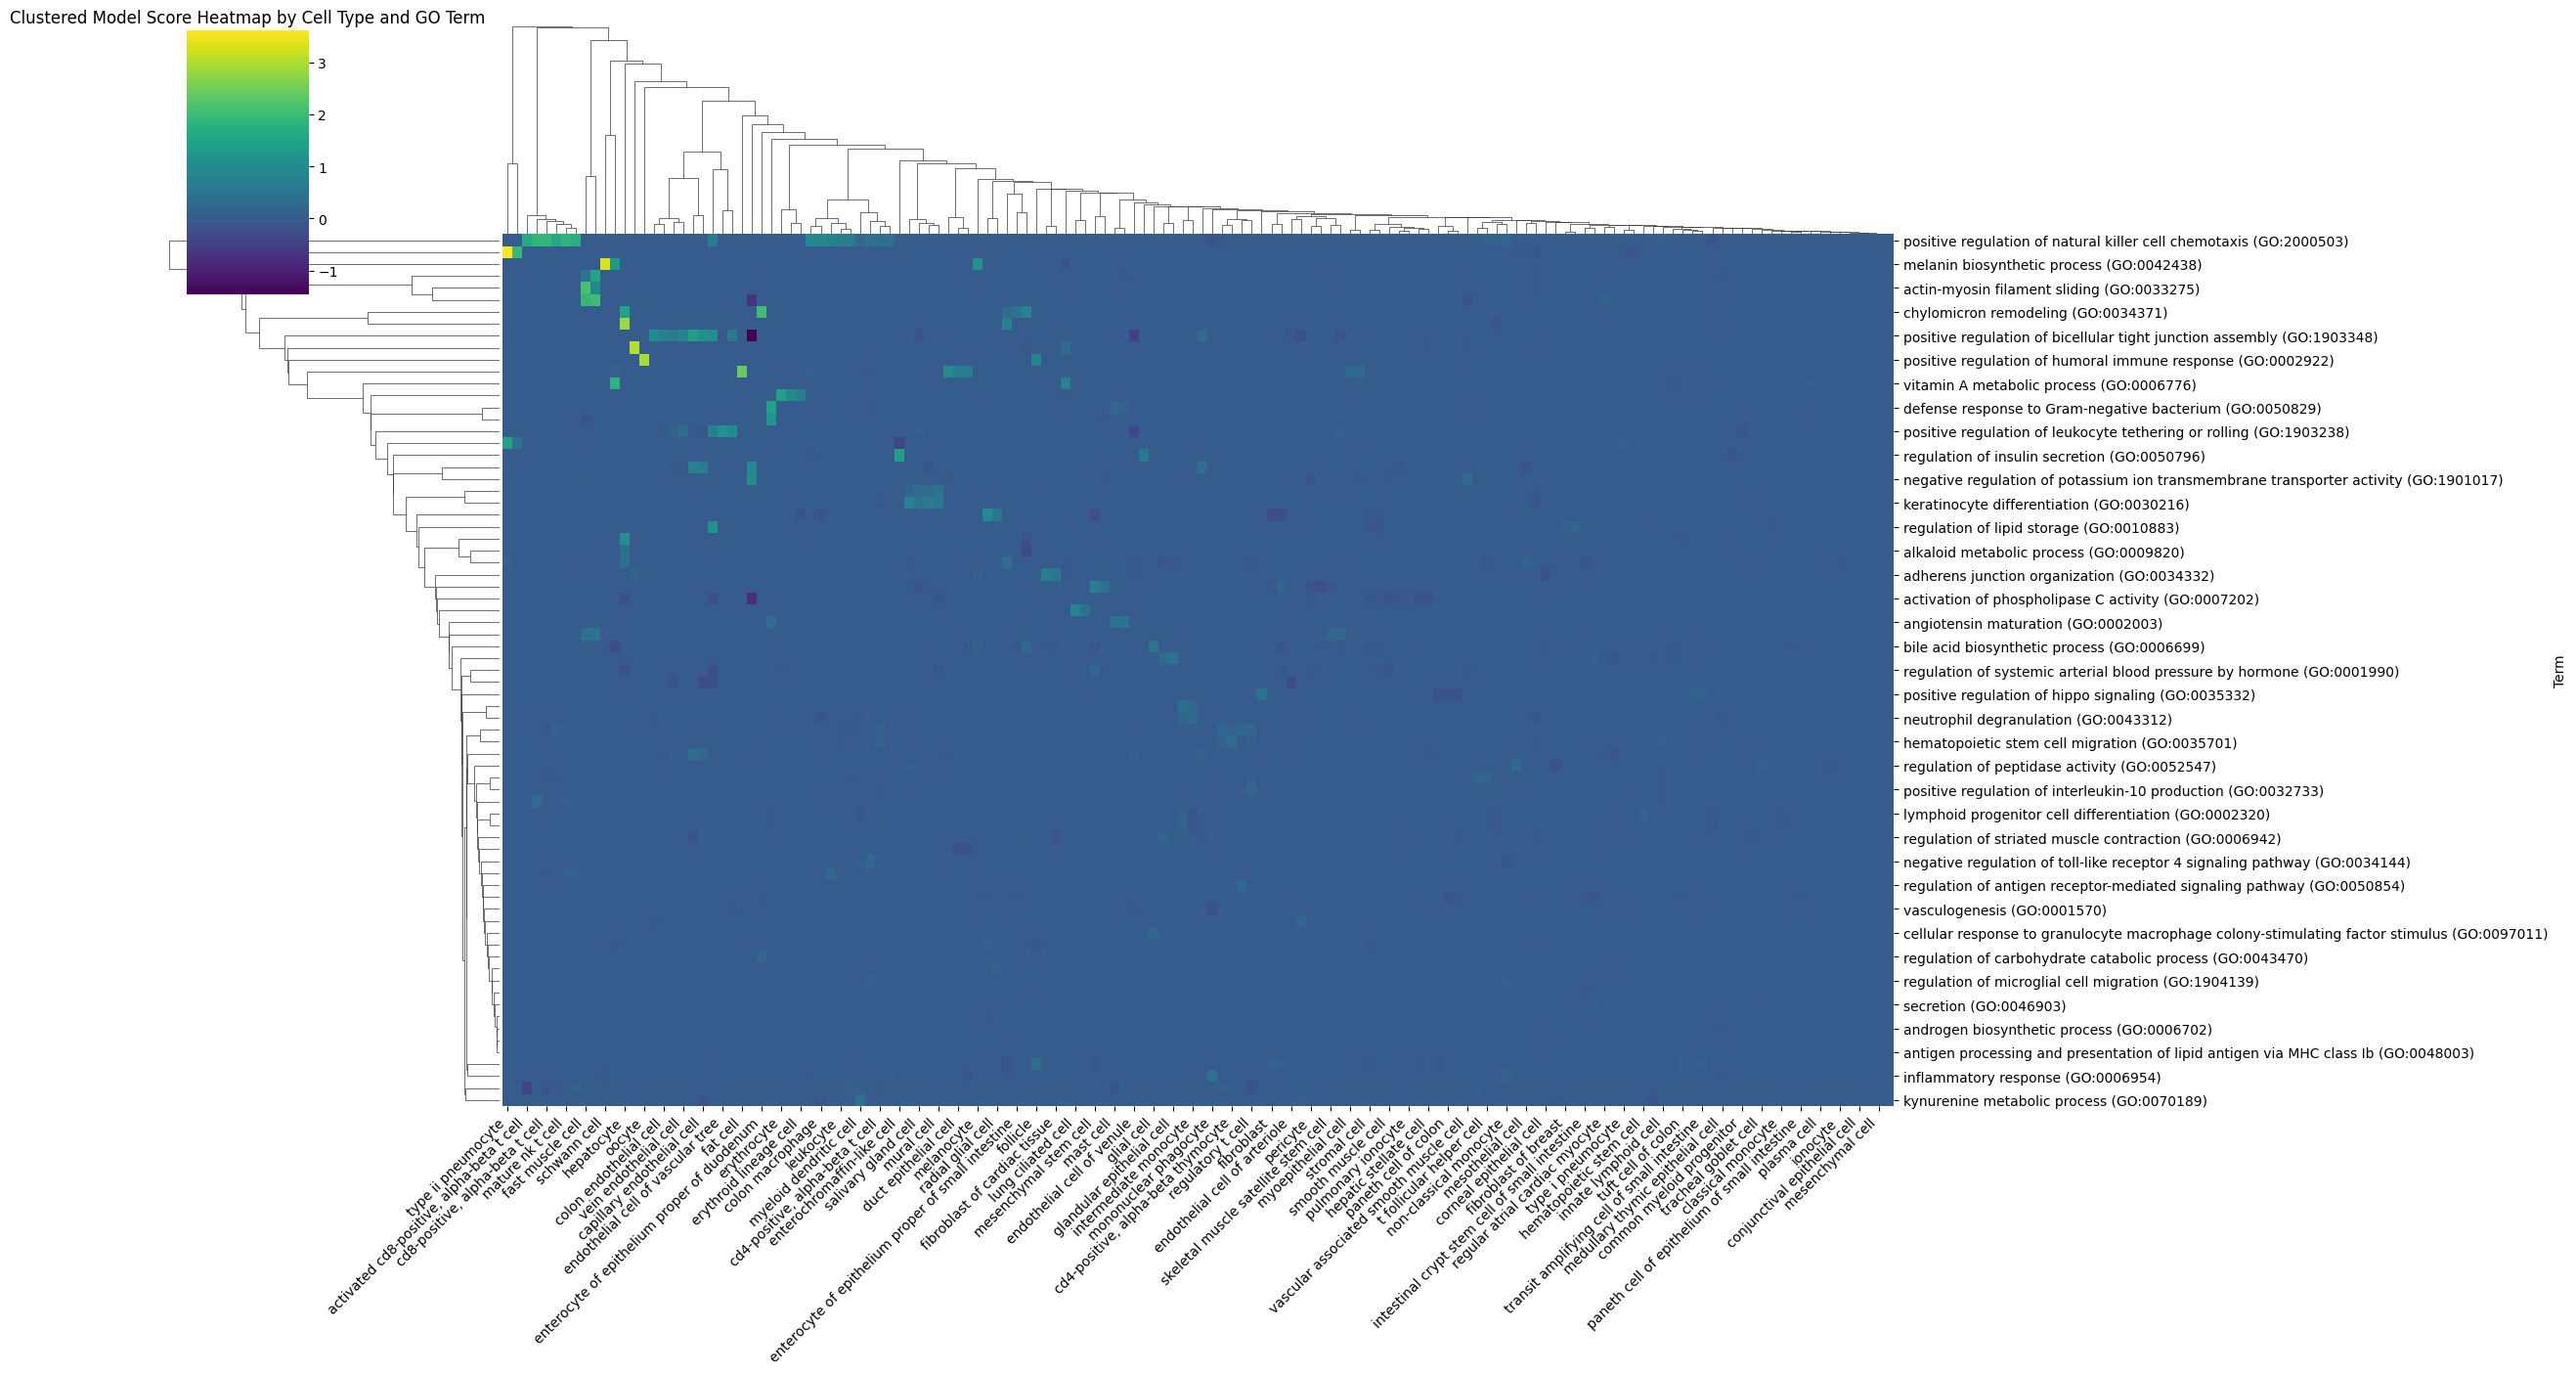

In [ ]:
g = sns.clustermap(heatmap_data, method='ward', metric='euclidean', cmap='viridis', figsize=(25, 15), annot=False, fmt=".2f")
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x labels for better visibility
plt.title('Clustered Model Score Heatmap by Cell Type and GO Term')
plt.show()